In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile


zip_data = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_data.extractall("/content/")
zip_data.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense
from keras.layers import Dropout ,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import cv2

In [ ]:
img = plt.imread("/content/train/cats/cat.10016.jpg")

array([[[29, 20, 23],
        [31, 22, 25],
        [34, 25, 28],
        ...,
        [21,  8,  2],
        [21,  8,  2],
        [21,  8,  2]],

       [[60, 51, 54],
        [58, 49, 52],
        [56, 47, 50],
        ...,
        [21,  8,  2],
        [21,  8,  2],
        [21,  8,  2]],

       [[93, 84, 87],
        [89, 80, 83],
        [85, 76, 79],
        ...,
        [22,  9,  3],
        [22,  9,  3],
        [22,  9,  3]],

       ...,

       [[54,  7,  0],
        [70, 28, 16],
        [82, 45, 36],
        ...,
        [80, 65, 70],
        [78, 66, 70],
        [78, 66, 70]],

       [[46,  2,  0],
        [68, 28, 16],
        [75, 38, 29],
        ...,
        [73, 58, 63],
        [71, 59, 63],
        [71, 59, 63]],

       [[51,  9,  0],
        [72, 32, 20],
        [65, 31, 21],
        ...,
        [69, 54, 59],
        [67, 55, 59],
        [67, 55, 59]]], dtype=uint8)
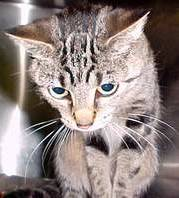

In [ ]:
img

In [ ]:
img = cv2.imread("/content/train/cats/cat.10016.jpg")

array([[[23, 20, 29],
        [25, 22, 31],
        [28, 25, 34],
        ...,
        [ 2,  8, 21],
        [ 2,  8, 21],
        [ 2,  8, 21]],

       [[54, 51, 60],
        [52, 49, 58],
        [50, 47, 56],
        ...,
        [ 2,  8, 21],
        [ 2,  8, 21],
        [ 2,  8, 21]],

       [[87, 84, 93],
        [83, 80, 89],
        [79, 76, 85],
        ...,
        [ 3,  9, 22],
        [ 3,  9, 22],
        [ 3,  9, 22]],

       ...,

       [[ 0,  7, 54],
        [16, 28, 70],
        [36, 45, 82],
        ...,
        [70, 65, 80],
        [70, 66, 78],
        [70, 66, 78]],

       [[ 0,  2, 46],
        [16, 28, 68],
        [29, 38, 75],
        ...,
        [63, 58, 73],
        [63, 59, 71],
        [63, 59, 71]],

       [[ 0,  9, 51],
        [20, 32, 72],
        [21, 31, 65],
        ...,
        [59, 54, 69],
        [59, 55, 67],
        [59, 55, 67]]], dtype=uint8)
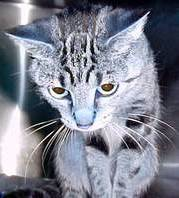

In [ ]:
img

## **Gentraing The Dataset**

In [ ]:
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)
test_ds =tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# **Data Augmentation Techinque**

In [ ]:
#datagen = ImageDataGenerator(rotation_range=10,
                            # width_shift_range=0.1,
                           #  height_shift_range=0.1,
                            # zoom_range=0.1,
                             #horizontal_flip=True,
                             #vertical_flip=True,
                             #shear_range=0.1,
                             )
#Apply the Data augmnetation on Training Dataset

#train_ds=datagen.flow_from_directory(
 #   directory=("/content/train"),
 #  target_size=(256, 256),
 #   color_mode='rgb',
  #  class_mode='binary',
  #  batch_size=32,
  #  shuffle=True,

#)

Found 20000 images belonging to 2 classes.


In [ ]:
def scale_down_px(image , label):
  image =  tf.cast(image/255 , tf.float32)

  return image , label


In [ ]:
train_ds = train_ds.map(scale_down_px)
test_ds = test_ds.map(scale_down_px)

In [ ]:
train_ds

In [ ]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# **Creating The CNN Architecture**

In [ ]:
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))


model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))


model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))


model.add(Flatten())


model.add(Dense(128,activation="relu"))
model.add(Dropout(0,1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0,1))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0,1))
model.add(Dense(1,activation="sigmoid"))




In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [ ]:
result = model.fit(train_ds,validation_data=test_ds, epochs=10)

NameError: name 'model' is not defined

# **Graph Measurement for Training And Validation Accuracy**

In [ ]:
plt.plot(result.history["accuracy"],color="r",label="Training Accuracy",marker="o")
plt.plot(result.history["val_accuracy"],color="b",label="Validation Accuracy",marker="*")
plt.title("Line Plot Training and val Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'result' is not defined

# **Graph Measurement for Training And Validation Loss**

In [ ]:
plt.plot(result.history["loss"],color="r",label="Training Loss",marker="o")
plt.plot(result.history["val_loss"],color="b",label="Validation Loss",marker="o")
plt.title("Line Plot Training and val Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **Testing The Model**

In [ ]:
def image_classifier(img_path):

    test_img = cv2.imread(img_path)
    print("Before Rezeing The Image",test_img.shape)
    test_img = cv2.resize(test_img,(256,256))
    print("After Rezeing The Image",test_img.shape)
    print("\n")
    test_input= test_img.reshape(1,256,256,3)
    output=model.predict(test_input)

    if output<=0.5:
      print("This is a Cat ")
    else:
      print("This is a Dog")

    print("\n")
    plt.imshow(test_img)

In [ ]:
image_classifier("/content/test/dogs/dog.10022.jpg")
image_classifier()

In [ ]:
image_classifier("/content/test/cats/cat.10033.jpg")

In [ ]:
image_classifier("/content/Fluffy_White_Persian_Cat.jpg.webp")

In [ ]:
  image_classifier("/content/WhatsApp Image 2024-04-05 at 22.30.17_5c883868.jpg")

In [ ]:
image_classifier("/content/WhatsApp Image 2024-04-05 at 23.00.36_a1b627aa.jpg")

In [ ]:
image_classifier("/content/WhatsApp Image 2024-04-05 at 23.00.36_f0ee42ec.jpg")

In [ ]:
image_classifier("/content/Blue-Nose-Pitbull-review.jpg")

In [ ]:
image_classifier("/content/download.jpeg")

In [ ]:
image_classifier("/content/images.jpeg")

In [ ]:
image_classifier("/content/download (1).jpeg")

In [ ]:
image_classifier("/content/images (1).jpeg")